### I will be working with [New York City Airbnb Open Data](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). I will explore these main topics:


###### Visualization of neighbourhoods with room type category
###### Visualization of prices for each neighbourhood group
###### Heatmap of room availability based on neighbourhood and room type
###### Airbnb map based on neighbourhood group and room type
###### Airbnb wordcloud based on name columns




### Import Libraries

In [3]:
#importing necessery libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import matplotlib.image as mpimg
sns.set_style('whitegrid')
%matplotlib inline


In [4]:
airbnb = pd.read_csv('AB_NYC_2019.csv')

In [5]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [6]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
# cheking the nul values
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

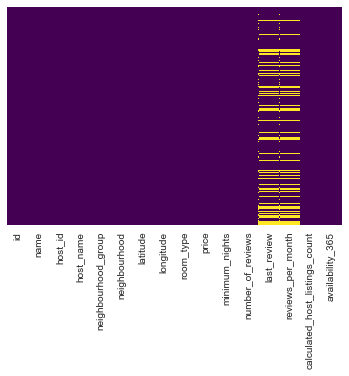

In [8]:
sns.heatmap(airbnb.isnull(),yticklabels = False,cbar = False, cmap = 'viridis')

In [9]:
# droping unnecessary columns for this analysis
airbnb.drop(['id','host_id', 'host_name','last_review', 'reviews_per_month'], axis = 1, inplace = True)

In [10]:
airbnb.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [11]:
airbnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [13]:
airbnb['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

#### Visualization of neighbourhoods with room type category

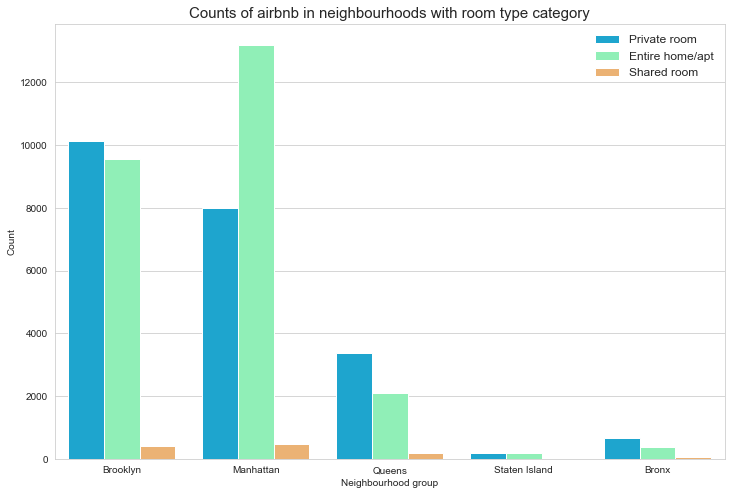

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(data=airbnb, x='neighbourhood_group', hue='room_type', palette= "rainbow")
plt.title('Counts of airbnb in neighbourhoods with room type category', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12)

Text(0, 0.5, 'Price')

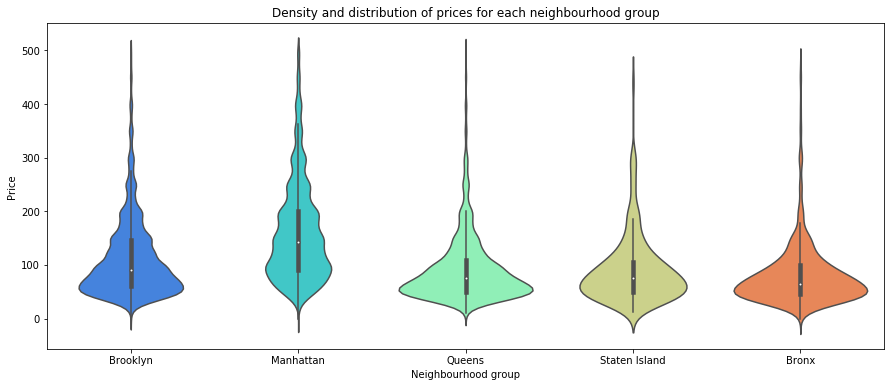

In [12]:
# Visualization of prices for each neighbourhood group

plt.figure(figsize=(15,6))
sns.violinplot(data=airbnb[airbnb.price <500], x='neighbourhood_group', y='price', palette='rainbow')
plt.title('Density and distribution of prices for each neighbourhood group', fontsize=12)
plt.xlabel('Neighbourhood group')
plt.ylabel("Price")

Text(0, 0.5, 'Price')

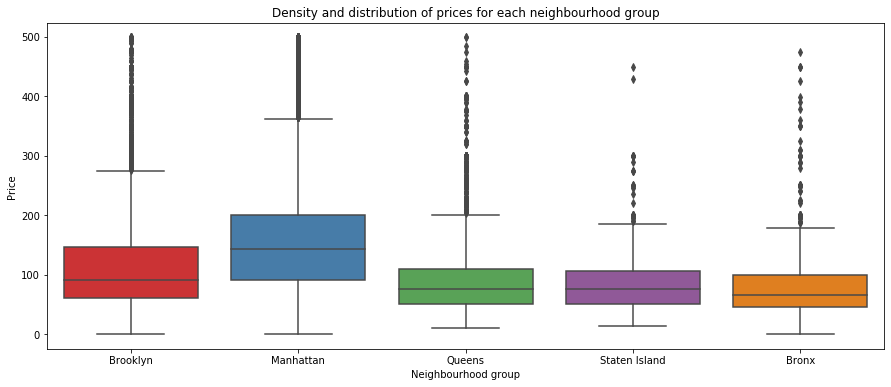

In [13]:
# Another visualization for price
plt.figure(figsize=(15,6))
sns.boxplot(data=airbnb[airbnb.price <500], x='neighbourhood_group', y='price', palette='Set1')
plt.title('Density and distribution of prices for each neighbourhood group', fontsize=12)
plt.xlabel('Neighbourhood group')
plt.ylabel("Price")

Text(114.0, 0.5, 'Neighbourhood Group')

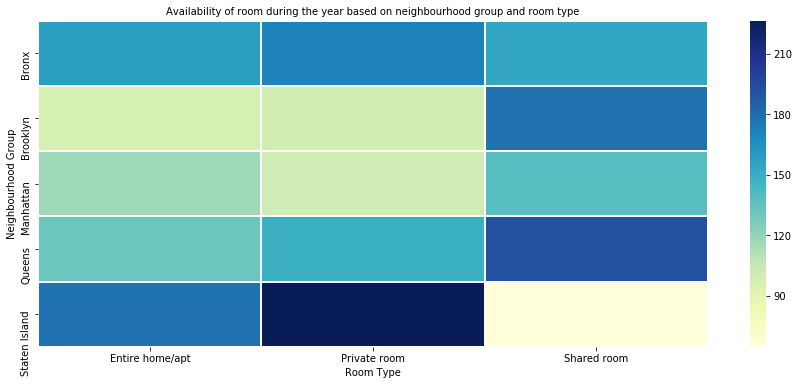

In [14]:
# Heatmap of room availability

plt.figure(figsize=(15,6))
pvairbnb = airbnb.pivot_table(values='availability_365',index='neighbourhood_group',columns='room_type')
sns.heatmap(pvairbnb,cmap="YlGnBu",linecolor='white',linewidths=1)
plt.title('Availability of room during the year based on neighbourhood group and room type', fontsize=10)
plt.xlabel('Room Type')
plt.ylabel("Neighbourhood Group")

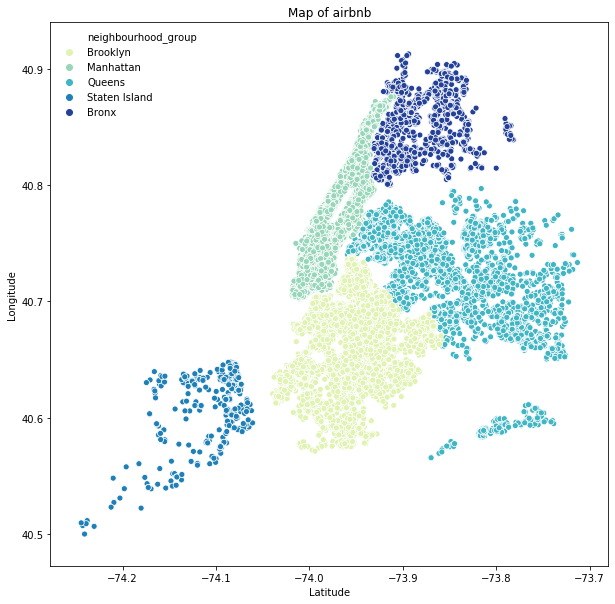

In [15]:
# Airbnb map based on neighbourhood group

plt.figure(figsize=(10,10))
a = sns.scatterplot(data=airbnb, x='longitude', y='latitude', hue='neighbourhood_group', palette="YlGnBu")
plt.title('Map of airbnb', fontsize=12)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=10)


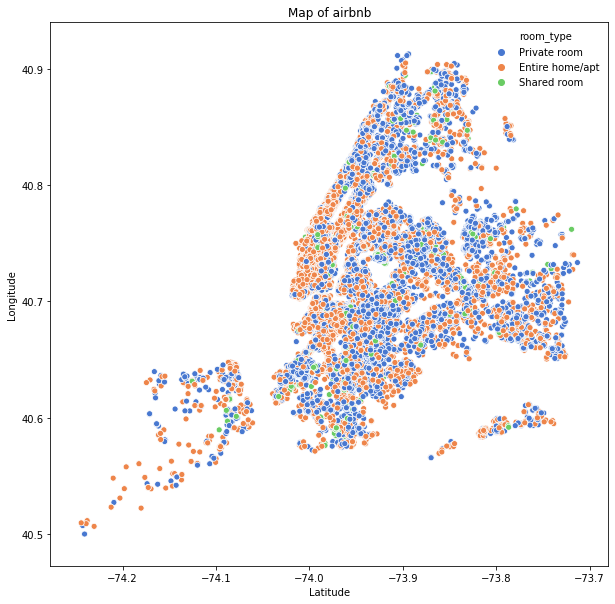

In [16]:
# Airbnb map based on room type

plt.figure(figsize=(10,10))
a = sns.scatterplot(data=airbnb, x='longitude', y='latitude', hue='room_type', palette="muted")
plt.title('Map of airbnb', fontsize=12)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=10)


In [17]:
import folium
from folium.plugins import HeatMap
m=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(airbnb[['latitude','longitude']].dropna(),radius=8).add_to(m)
display(m)

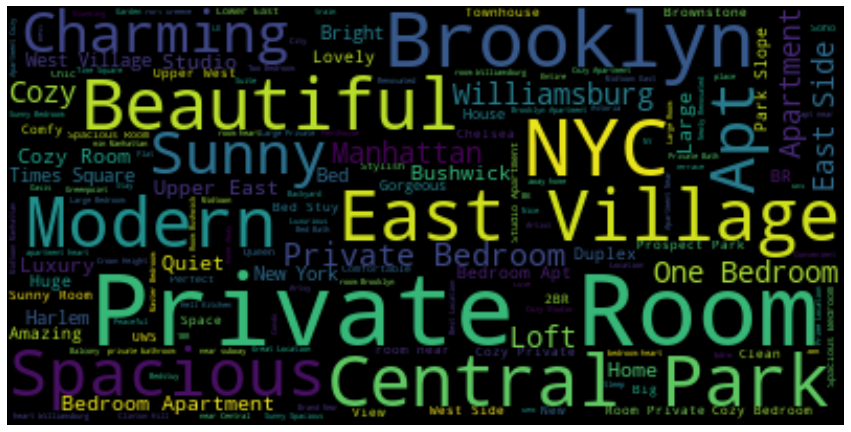

In [18]:
# # Creating a word cloud image:


from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in airbnb['name'])
wordcloud = WordCloud(max_words=200, background_color="black").generate(text)
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()